In [7]:
import sys
!{sys.executable} -m pip install tensorflow

  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-win_amd64.whl size=33367 sha256=a21a11a98b429a7185bd7b9771efd208489fc141921aff74d5797597be9079da
  Stored in directory: c:\users\louis\appdata\local\pip\cache\wheels\62\76\4c\aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=7ee320560a05299f93aef65f9f8bf18c74f34142bf39f3d5cac0dc66cfef3a96
  Stored in directory: c:\users\louis\appdata\local\pip\cache\wheels\3f\e3\ec\8a8336ff196023622fbcb36de0c5a5c218cbb24111d1d4c7f2
  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30707 sha256=36b874dec0e9a55b50292bcef9e1017843140580a357673ef03c9c3547fbb68a
  Stored in directory: c:\users\louis\appdata\local\pip\cache\wheels\98\91\04\971b4c587cf47ae952b108949b46926f426c02832d120a082a
Successfully built wrapt termcolor clang
  Attempting uninstall: six
    Found existing installation

ERROR: pytest-astropy 0.8.0 requires pytest-cov>=2.0, which is not installed.
ERROR: pytest-astropy 0.8.0 requires pytest-filter-subpackage>=0.1, which is not installed.
ERROR: astroid 2.3.3 requires typed-ast<1.5,>=1.4.0; implementation_name == "cpython" and python_version < "3.8", which is not installed.
ERROR: astroid 2.3.3 has requirement wrapt==1.11.*, but you'll have wrapt 1.12.1 which is incompatible.
ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Accès refusé: 'c:\\users\\louis\\anaconda3\\lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [9]:
import sys
!{sys.executable} -m pip install opencv-python

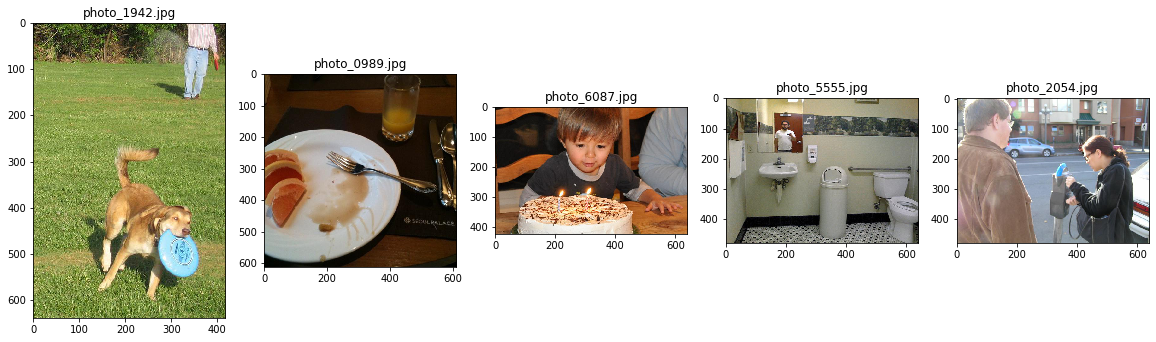

Found 41396 files belonging to 5 classes.
Using 8279 files for validation.
Found 41396 files belonging to 5 classes.
Using 33117 files for training.
['Painting', 'Photo', 'Schematics', 'Sketch', 'Text']


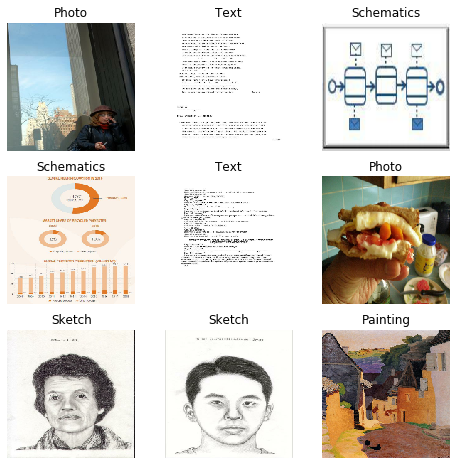

(32, 180, 180, 3)
(32,)


In [10]:


%run img_loading.ipynb

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

ds_train = ds_train.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
ds_test = ds_test.cache().prefetch(buffer_size=AUTOTUNE)

In [12]:
num_classes = 5 # Nombre de classes et donc aussi nombre de neurones dans la dernière couche
model = tf.keras.models.Sequential()

model = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255, offset=0),
  tf.keras.layers.Conv2D(32, [3,3], activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(16, [3,3], activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(8, [3,3], activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [13]:
model.add(layers.experimental.preprocessing.Rescaling(
    #A COMPLETER
    scale=1.0/255,
    offset=0,
    )
)

In [14]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Epoch 1/10
1035/1035 [==============================] - 385s 299ms/step - loss: 0.7782 - accuracy: 0.6450 - val_loss: 0.5399 - val_accuracy: 0.7660
Epoch 2/10
1035/1035 [==============================] - 311s 301ms/step - loss: 0.5161 - accuracy: 0.7715 - val_loss: 0.4648 - val_accuracy: 0.8014
Epoch 3/10
1035/1035 [==============================] - 354s 342ms/step - loss: 0.4508 - accuracy: 0.8010 - val_loss: 0.4391 - val_accuracy: 0.8151
Epoch 4/10
1035/1035 [==============================] - 375s 363ms/step - loss: 0.4090 - accuracy: 0.8238 - val_loss: 0.4149 - val_accuracy: 0.8256
Epoch 5/10
1035/1035 [==============================] - 374s 361ms/step - loss: 0.3756 - accuracy: 0.8426 - val_loss: 0.3706 - val_accuracy: 0.8415
Epoch 6/10
1035/1035 [==============================] - 370s 358ms/step - loss: 0.3431 - accuracy: 0.8568 - val_loss: 0.3370 - val_accuracy: 0.8660
Epoch 7/10
1035/1035 [==============================] - 366s 354ms/step - loss: 0.3161 - accuracy: 0.8696 - val_

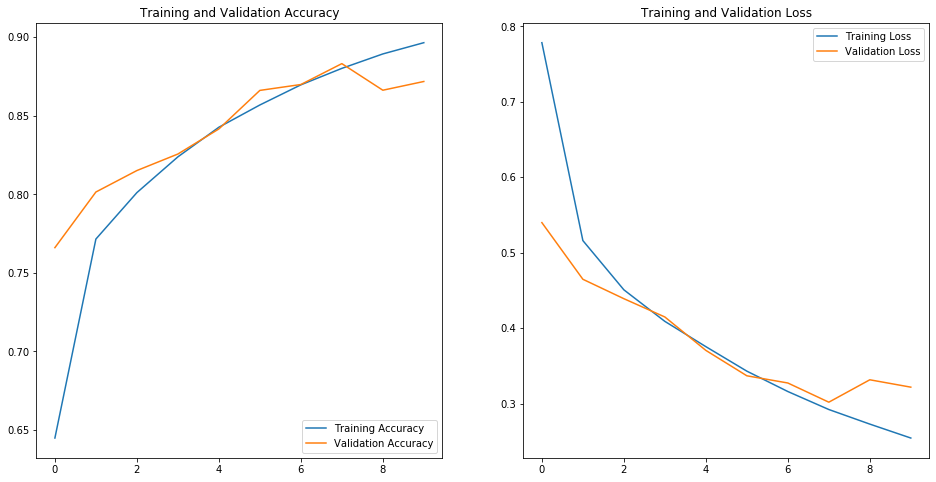

In [15]:
epochs=10

history = model.fit(ds_train,
                    validation_data=ds_test,
                    epochs=epochs)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [24]:
model.save(filepath="model1.h5",
           overwrite=True,
           include_optimizer=True,
           save_format=None,
           signatures=None,
           options=None,
           save_traces=True
)